## Objective
*The objective of this analysis is to explore the Iris dataset to:*

- Are there any missing or inconsistent values in the dataset?
- Understand the distribution of petal and sepal sizes across different species.
- Identify patterns and relationships between features using visualizations.
- Detect similarities and differences among the three Iris species.
- Which features best distinguish the three species?

In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="MySQL@123Secure!",
    database="iris_db"
)

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("SELECT * FROM iris")

In [5]:
rows = cursor.fetchall()

In [6]:
columns = [i[0] for i in cursor.description]

In [7]:
df = pd.DataFrame(rows, columns=columns)

In [8]:
#cursor.close()

In [9]:
df.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
with open("queries.sql", "r") as file:
    sql_queries = file.read()
print(sql_queries)

CREATE DATABASE iris_db;
USE iris_db;

CREATE TABLE iris (
    id INT AUTO_INCREMENT PRIMARY KEY,
    sepal_length FLOAT,
    sepal_width FLOAT,
    petal_length FLOAT,
    petal_width FLOAT,
    species VARCHAR(50)
);


SHOW VARIABLES LIKE 'secure_file_priv';

LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Iris.csv'
INTO TABLE iris
FIELDS TERMINATED BY ',' 
ENCLOSED BY '"'
LINES TERMINATED BY '\n'
IGNORE 1 ROWS
(id, sepal_length, sepal_width, petal_length, petal_width, species);

SELECT * FROM iris LIMIT 5;

SELECT COUNT(*) FROM iris;

SELECT DISTINCT species FROM iris;

SELECT COLUMN_NAME
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'iris';

SELECT * FROM iris
WHERE 
sepal_length IS NULL
OR sepal_width IS NULL
OR petal_length IS NULL
OR petal_width IS NULL
OR species IS NULL;

SELECT species, 
AVG(petal_length) AS avg_petal_length,
AVG(petal_width) AS avg_petal_width,
AVG(sepal_length) AS avg_sepal_length,
AVG(sepal_width) AS avg_sepal_width
FROM iris
GROUP BY 

In [11]:
df.shape

(150, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.describe()

,id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
df.isnull().sum()

id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Data Distribution Visualization

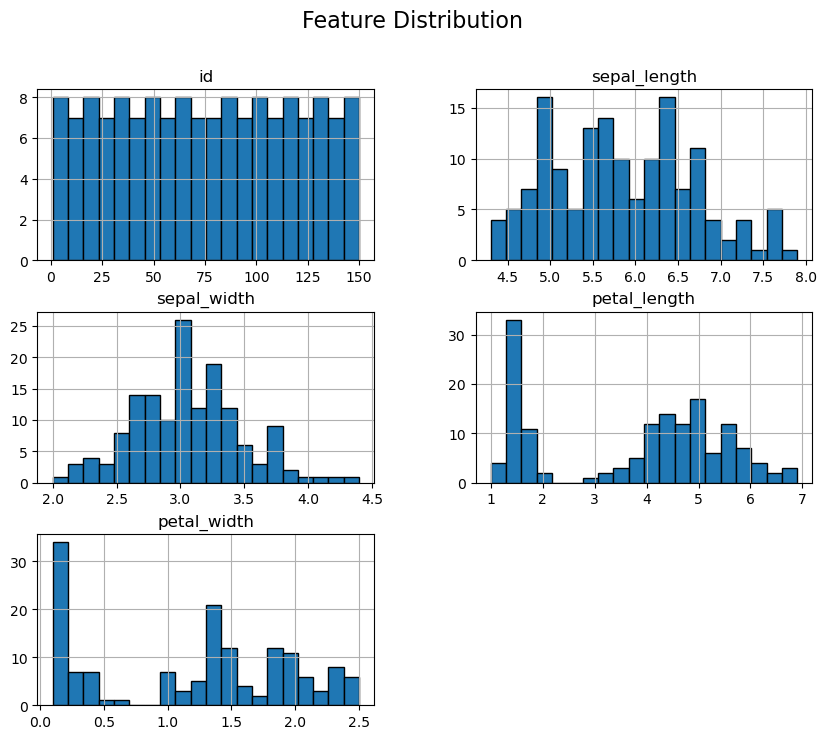

In [15]:
df.hist(figsize=(10,8), bins=20, edgecolor='black')
plt.suptitle('Feature Distribution', fontsize=16)
plt.show()

### Boxplots to Detect Outliers

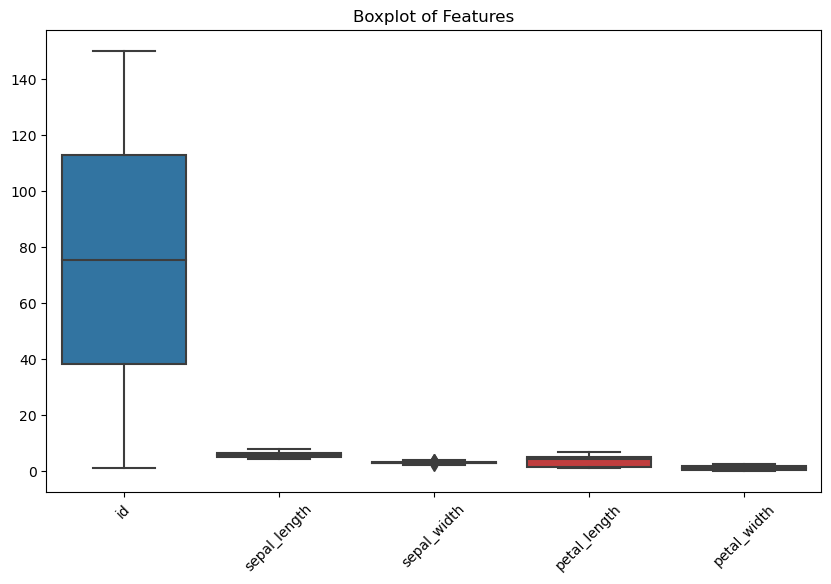

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

###  Pairplot for Feature Relationships

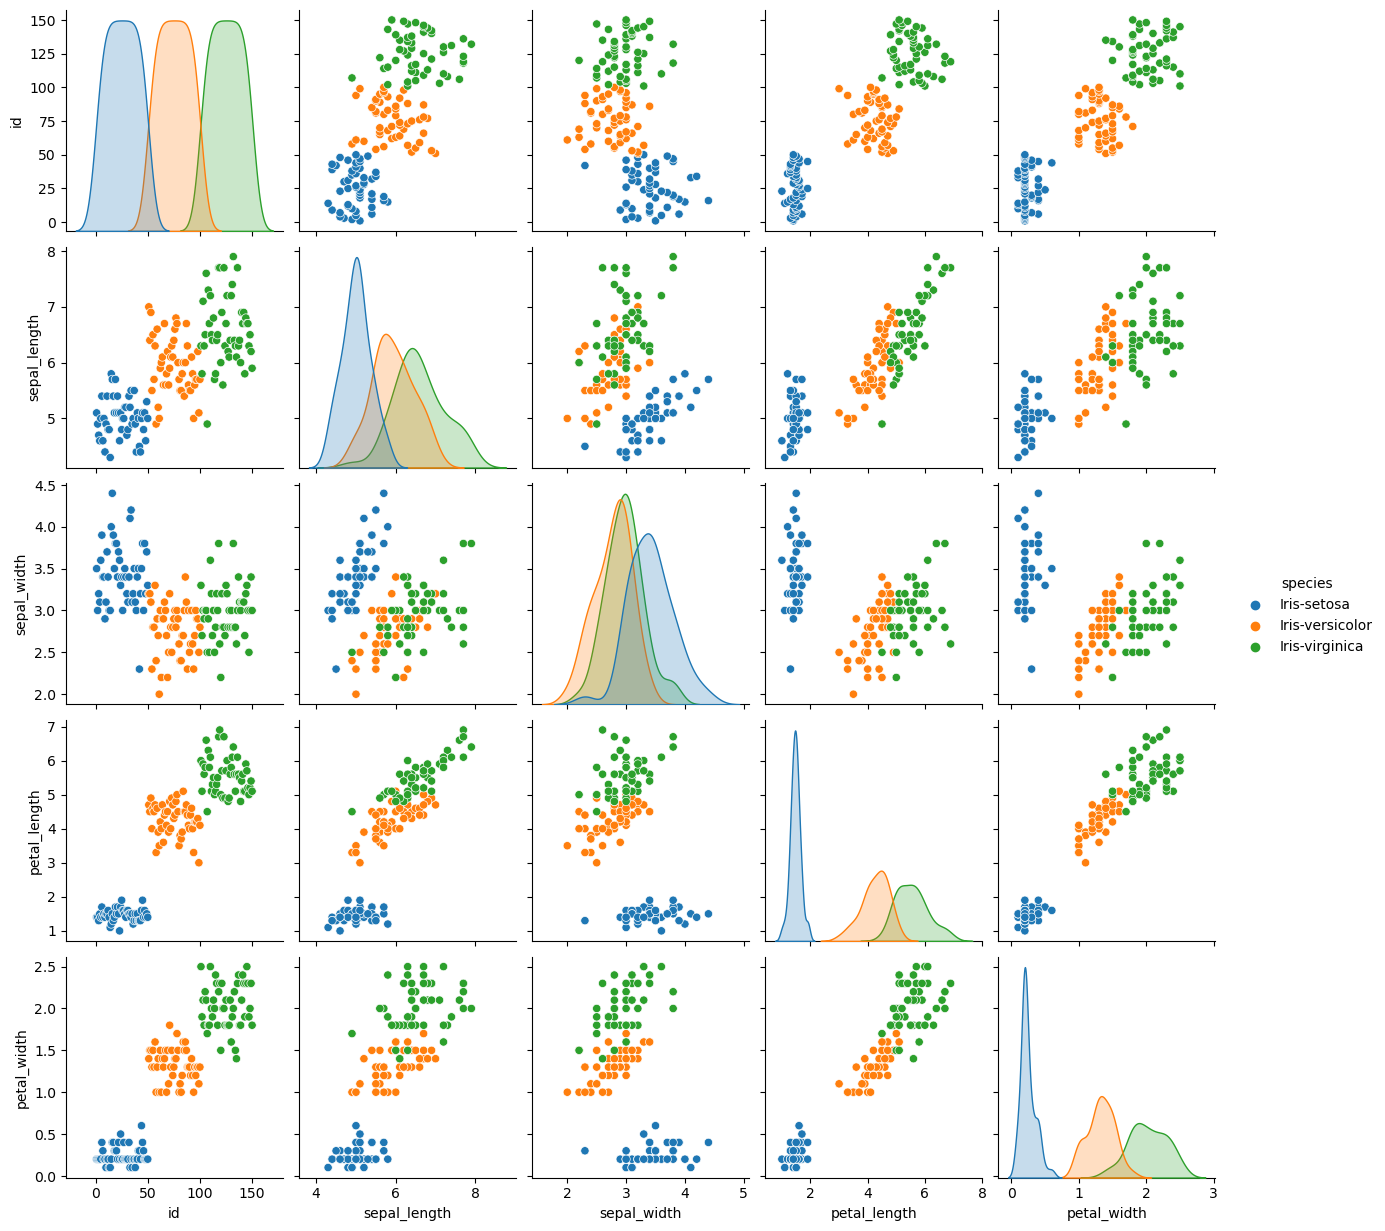

In [17]:
sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()

#### Insights from the Pair Plot 📊
*The pair plot helps visualize relationships between numerical features for each species:*

1️⃣ Sepal vs. Petal Differences Across Species
- Setosa is well-separated from the other two species, with smaller petal length and width.
- Versicolor and Virginica have some overlap, especially in petal dimensions.

2️⃣ Strong Correlation Between Petal Length & Petal Width
- Petal length and petal width are strongly correlated across all species.

3️⃣ Sepal Features Are Less Discriminative
- Sepal length and width don’t separate species as clearly as petal features do.

4️⃣ Setosa is Unique & Easy to Classify
- Setosa has distinctly smaller petals, making it easy to classify compared to Versicolor and Virginica.



### Distribution of petal and sepal sizes.

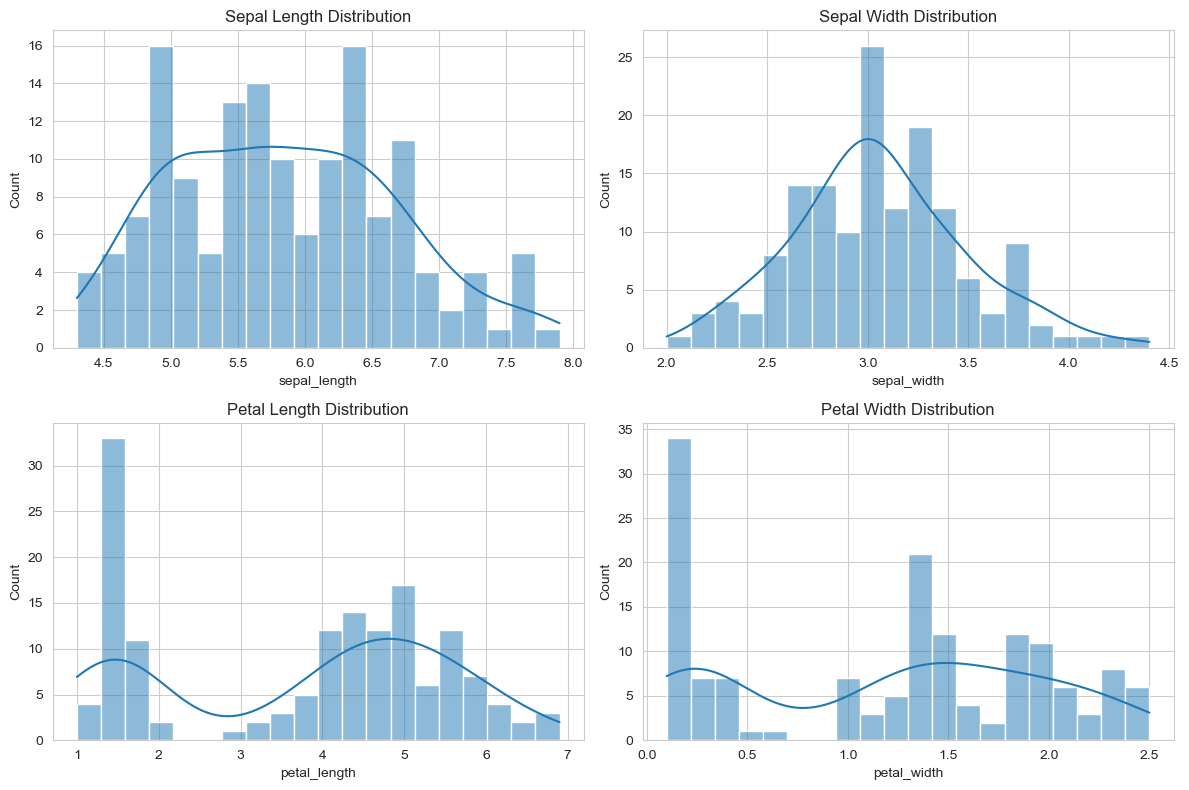

In [18]:
# Set style
sns.set_style("whitegrid")

# Create subplots for histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms
sns.histplot(df['sepal_length'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Sepal Length Distribution")

sns.histplot(df['sepal_width'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Sepal Width Distribution")

sns.histplot(df['petal_length'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Petal Length Distribution")

sns.histplot(df['petal_width'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Petal Width Distribution")

plt.tight_layout()
plt.show()

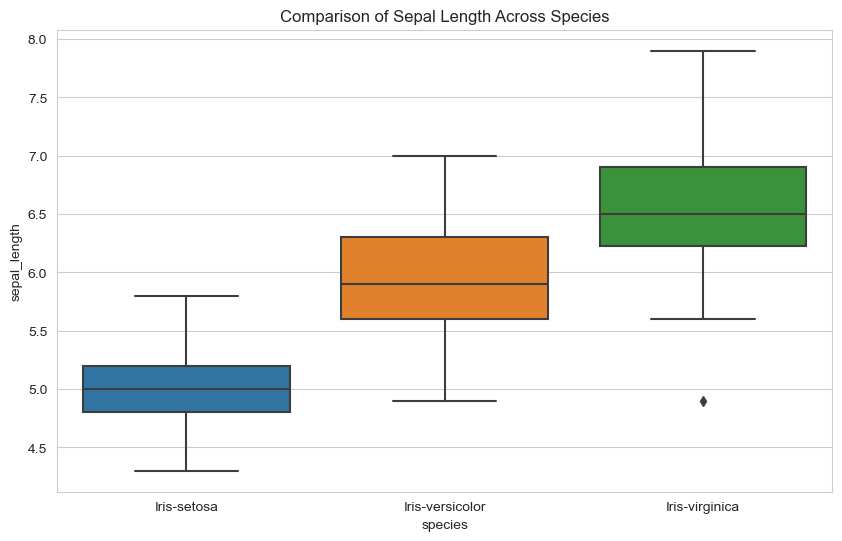

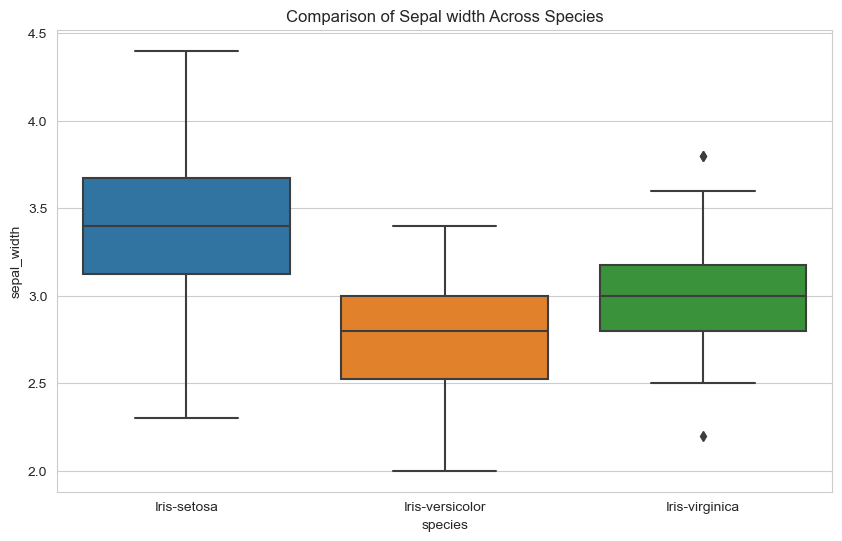

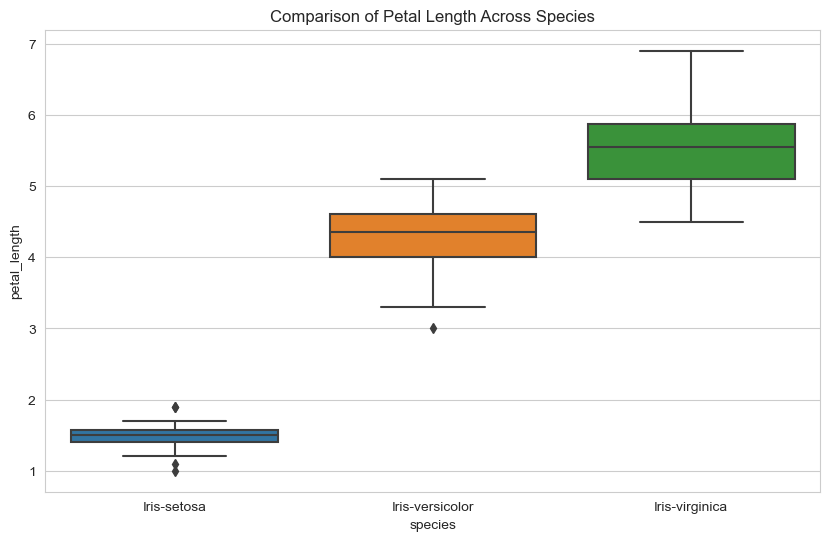

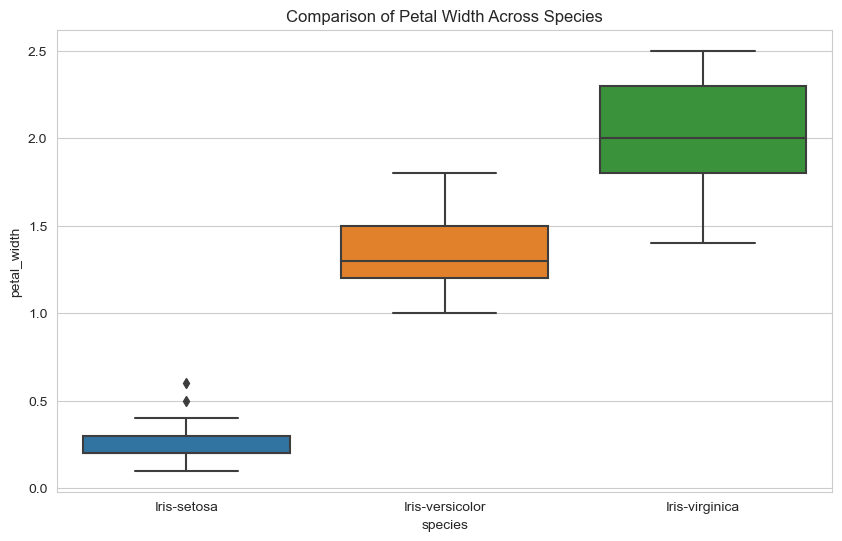

In [19]:
# Sepal Length Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="sepal_length", data=df)
plt.title("Comparison of Sepal Length Across Species")
plt.show()

# Sepal Width Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="sepal_width", data=df)
plt.title("Comparison of Sepal width Across Species")
plt.show()

# Petal Length Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="petal_length", data=df)
plt.title("Comparison of Petal Length Across Species")
plt.show()

# Petal Width Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="petal_width", data=df)
plt.title("Comparison of Petal Width Across Species")
plt.show()

In [20]:
df.groupby("species")["petal_width"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


- Setosa: Petal width is smallest, with very little variation.
- Versicolor: Intermediate petal width, moderate spread.
- Virginica: Largest petal width, with some overlap with Versicolor.

- Setosa has small petal & sepal sizes with little variation.
- Versicolor & Virginica overlap in some cases, especially in sepal dimensions.
- Petal size (length & width) is the best separator between species.

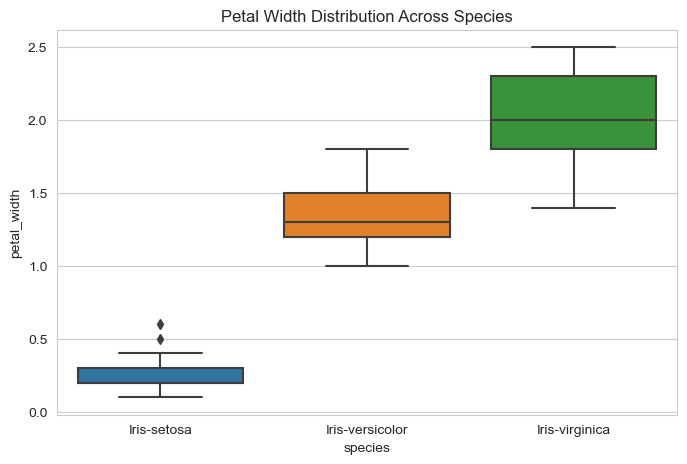

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="species", y="petal_width", data=df)
plt.title("Petal Width Distribution Across Species")
plt.show()

- Setosa has the lowest petal width (~0.1 to 0.6).
- Virginica has the highest (~1.4 to 2.5).
- Versicolor is in between, but has some overlap with Virginica.

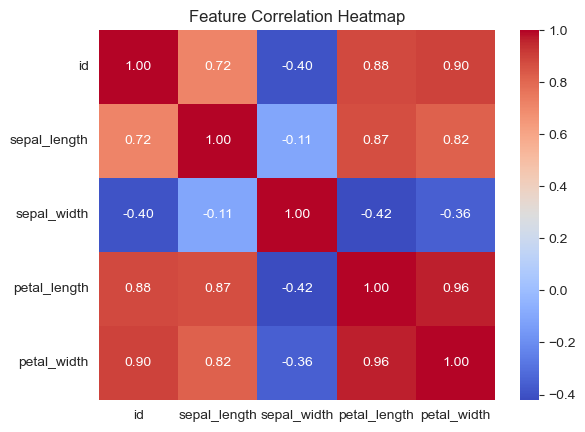

In [22]:
df.corr()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

- Petal length and petal width have the highest correlation (~0.96).
- Sepal width has a weak correlation with other features, meaning it's less useful for classification.

In [23]:
### Summary of Key Insights
1️⃣ Setosa is the most distinct species due to its small petal size and wide sepals.
2️⃣ Petal length and width are the best features for classification (high correlation).
3️⃣ Sepal width does not contribute much to distinguishing species.
4️⃣ Versicolor and Virginica have some overlap, but Virginica has generally larger petal sizes.

SyntaxError: invalid character '️' (U+FE0F) (1471953740.py, line 2)